<a href="https://colab.research.google.com/github/Russo-Federico/DeepLearningFundamentals/blob/main/IBM-PyTorch-Basics/0-PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Basic operations on tensors

In [12]:
torch_tensor = torch.tensor([1,2,3,4,5])
print(torch_tensor)

torch_tensor_casting = torch.tensor([1,2,3,4,5], dtype=torch.float32)
print(torch_tensor_casting)

print(torch_tensor.dtype)
print(torch_tensor.type())

print(torch_tensor.ndimension())
a_col = torch_tensor.view(-1,1)
print(a_col)

tensor([1, 2, 3, 4, 5])
tensor([1., 2., 3., 4., 5.])
torch.int64
torch.LongTensor
1
tensor([[1],
        [2],
        [3],
        [4],
        [5]])


**N.B.** each element of a tensor is a tensor itself, to get the python number use the .item() funciton

In [20]:
print(torch_tensor[0])
print(torch_tensor[0].item())

tensor(1)
1


In [21]:
section_tensor = torch_tensor[1:3]
print(section_tensor)

tensor([2, 3])


assign new values to tensor elements

In [23]:
torch_tensor[2] = torch.tensor([27])
print(torch_tensor)
print(section_tensor)

tensor([ 1,  2, 27,  4,  5])
tensor([ 2, 27])


N.B as can be seen above, the tensor rifer to the original, so changing one changes all the others

Flowless integration within the python environment

In [18]:
numpy_array = np.array([9,8,7,6])
print(numpy_array)

to_torch = torch.from_numpy(numpy_array)
print(to_torch)

back_to_numpy = to_torch.numpy()
print(back_to_numpy)

[9 8 7 6]
tensor([9, 8, 7, 6])
[9 8 7 6]


# Basic Operations

In [32]:
# init
a = torch.tensor([1,2])
b = torch.tensor([3,4])

c = a+b
print(c)

# scalar product
c = c * 2
print(c)

# tensor product
c = a * b
print(c)

# dot product
c = torch.dot(a,b)
print(c)

# adding constant
c = a + 2
print(c)

tensor([4, 6])
tensor([ 8, 12])
tensor([3, 8])
tensor(11)
tensor([3, 4])


**universal functions**

In [41]:
a_float = a.type(torch.FloatTensor)
print(a_float)

# get mean
mean_a = a_float.mean()
print(mean_a)

# get max
a_max = a.max()
print(a_max)

tensor([1., 2.])
tensor(1.5000)
tensor(2)


tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
tensor([ 0.9589,  0.7568, -0.1411, -0.9093, -0.8415,  0.0000,  0.8415,  0.9093,
         0.1411, -0.7568, -0.9589])


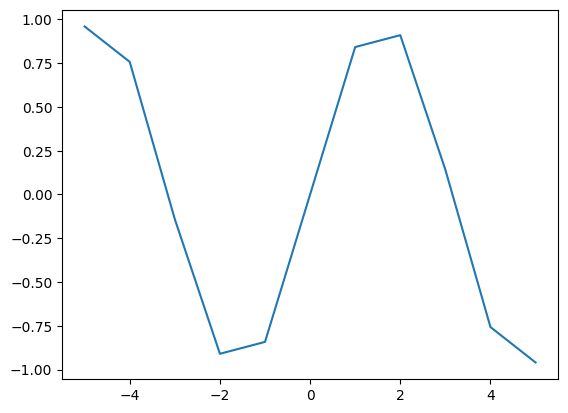

In [39]:
# linspace ideal for plotting funcitons
x = torch.linspace(-5,5,11) #starting point, ending point, steps
print(x)

y = torch.sin(x)
print(y)

plt.plot(x.numpy(), y.numpy())